In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
#plt.style.use('fivethirtyeight')

In [2]:
%matplotlib inline
from pylab import rcParams
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
import math
from sklearn.metrics import mean_squared_error
from random import random
import datetime

In [3]:
# for getting accss of gdrive file
#from google.colab import drive
#drive.mount('/content/contentprice.csv')
#import your dataframe
df = pd.read_excel("C:/Users/Jasmin Hirani/Desktop/dummy data.xlsx")

In [ ]:
#########file_path = r'C:\Users\ASUS\Downloads\ISRO DATA\Main data\modeldata.xlsx'

######sheet_name = 'dummydata'
#df = pd.read_excel(file_path, sheet_name=sheet_name)
##########

In [6]:
df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)
df.head(1)

,Date,price,arrival,CoC,CoP
0,2006-01-01,924.689136,6554.26375,27184.11,1708.81


In [7]:
df.set_index('Date', inplace=True)
df.head(1)

,price,arrival,CoC,CoP
Date,,,,
2006-01-01,924.689136,6554.26375,27184.11,1708.81


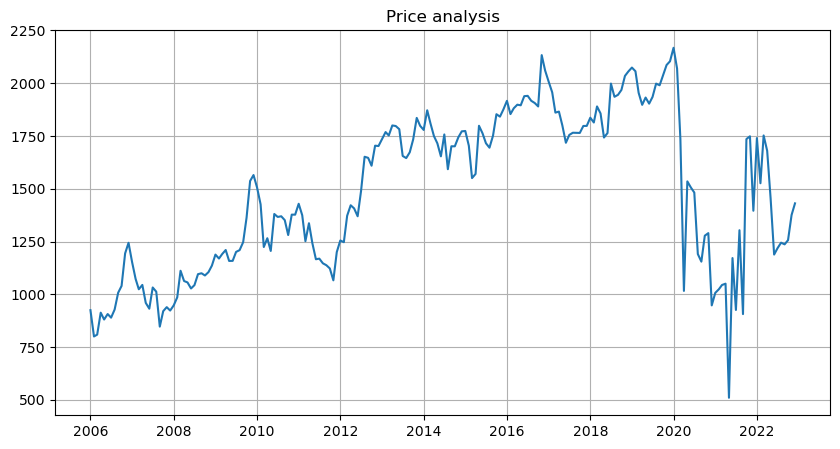

In [8]:
# Visualize
plt.figure(figsize=(10, 5))
plt.plot(df['price'])
plt.title('Price analysis')
plt.grid(True)
plt.show();

************ARIMA and Seasonal ARIMA
Autoregressive Integrated Moving Averages
STEPS:
Visualize the Time Series Data
Make the time series data stationary
Plot the Correlation and AutoCorrelation Charts
Construct the ARIMA Model or Seasonal ARIMA based on the data
Use the model to make predictions
**********************[link text](https://)

In [35]:
df.describe()

,price,arrival,CoC,CoP
count,204.000000,204.000000,204.000000,204.000000
mean,1484.903949,3827.616028,65303.409412,3706.235588
std,371.190206,3540.516162,20324.160434,1318.503069
min,509.681266,22.514286,27184.110000,1708.810000
25%,1168.224542,666.036186,53725.770000,2414.760000
50%,1505.898398,2951.150227,71248.340000,3839.790000
75%,1797.670538,6326.864464,85349.910000,4442.730000
max,2168.055458,15350.542778,90293.410000,6033.490000


In [9]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['price'])

In [10]:
test_result

(-2.061075824856903,
 0.260451368736774,
 13,
 190,
 {'1%': -3.4652439354133255,
  '5%': -2.8768752281673717,
  '10%': -2.574944653739612},
 2387.555827336527)

In [11]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result1=adfuller(df['price'].diff().dropna())
test_result1

(-3.693484324829367,
 0.004205741996463211,
 12,
 190,
 {'1%': -3.4652439354133255,
  '5%': -2.8768752281673717,
  '10%': -2.574944653739612},
 2378.509348813605)

#Ho: It is non stationary
#H1: It is stationary

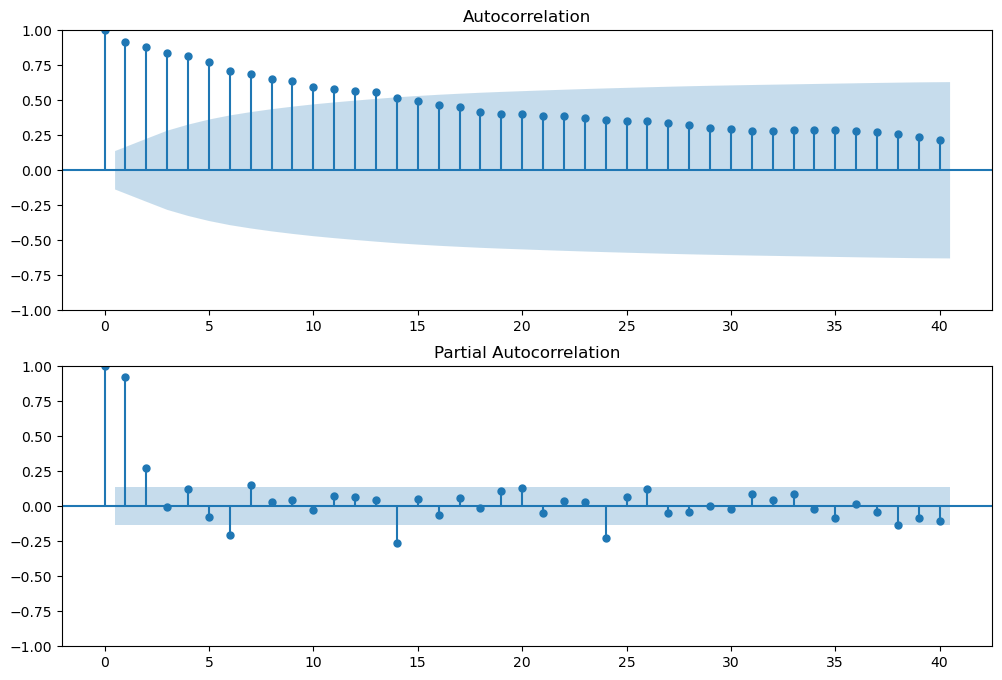

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['price'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['price'], lags=40, ax=ax2)
plt.show()

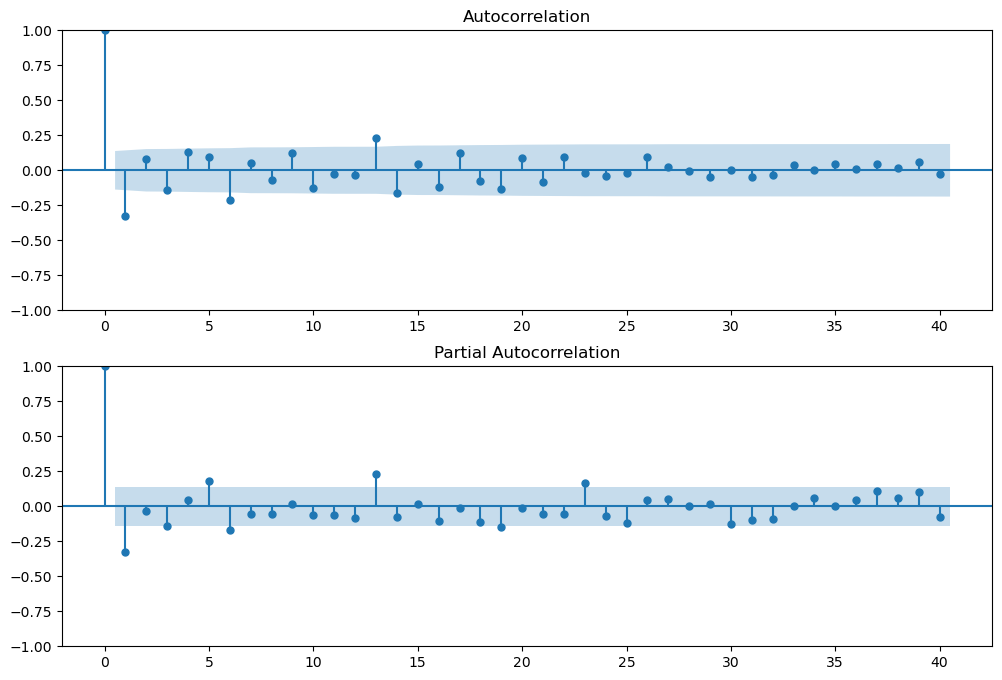

In [13]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#Plots with first order differenced Sales variable
fig = sm.graphics.tsa.plot_acf(df['price'].diff().dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['price'].diff().dropna(), lags=40, ax=ax2)
plt.show()

In [14]:

X = df['price']
X = X.values
train, test = X[0:len(X)-60], X[len(X)-60:]

In [15]:
!pip install pmdarima --quiet

In [16]:
from pmdarima.arima import auto_arima

In [17]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0,
                          max_p=5, max_d=5, max_q=5, start_P=0,
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True,
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1593.340, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1567.537, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.74 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1595.079, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1541.871, Time=0.60 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1525.947, Time=1.29 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=1525.316, Time=2.26 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=1522.549, Time=4.20 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=13.59 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=7.43 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=1520.847, Time=2.54 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=1523.539, Time=1.40 sec
 ARIMA(0,1,0)(5,1,1)[12]             : AIC=1521.599, Time=6.83 sec
 ARIMA(0,1,0)(4,1,1)[12]             : AIC=1520.661, Time=5.77 sec
 ARIMA(0,1,0)(3,1,1)[12]         

In [18]:
#Summary of the model
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  144
Model:             SARIMAX(0, 1, 0)x(2, 1, [1], 12)   Log Likelihood                -754.785
Date:                              Fri, 06 Oct 2023   AIC                           1517.570
Time:                                      10:56:16   BIC                           1529.071
Sample:                                           0   HQIC                          1522.244
                                              - 144                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1893      0.145     -1.303      0.193      -0.474       0.096
ar.S.L24      -0.2444      0.131     -1.863      0.062      -0.502       0.013
ma.S.L12      -0.8229      0.225     -3.658      0.000      -1.264      -0.382
sigma2      5023.1331    547.813      9.169      0.000    3949.439    6096.827
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                17.86
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                             0.41
Prob(H) (two-sided):                  0.39   Kurtosis:                         4.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

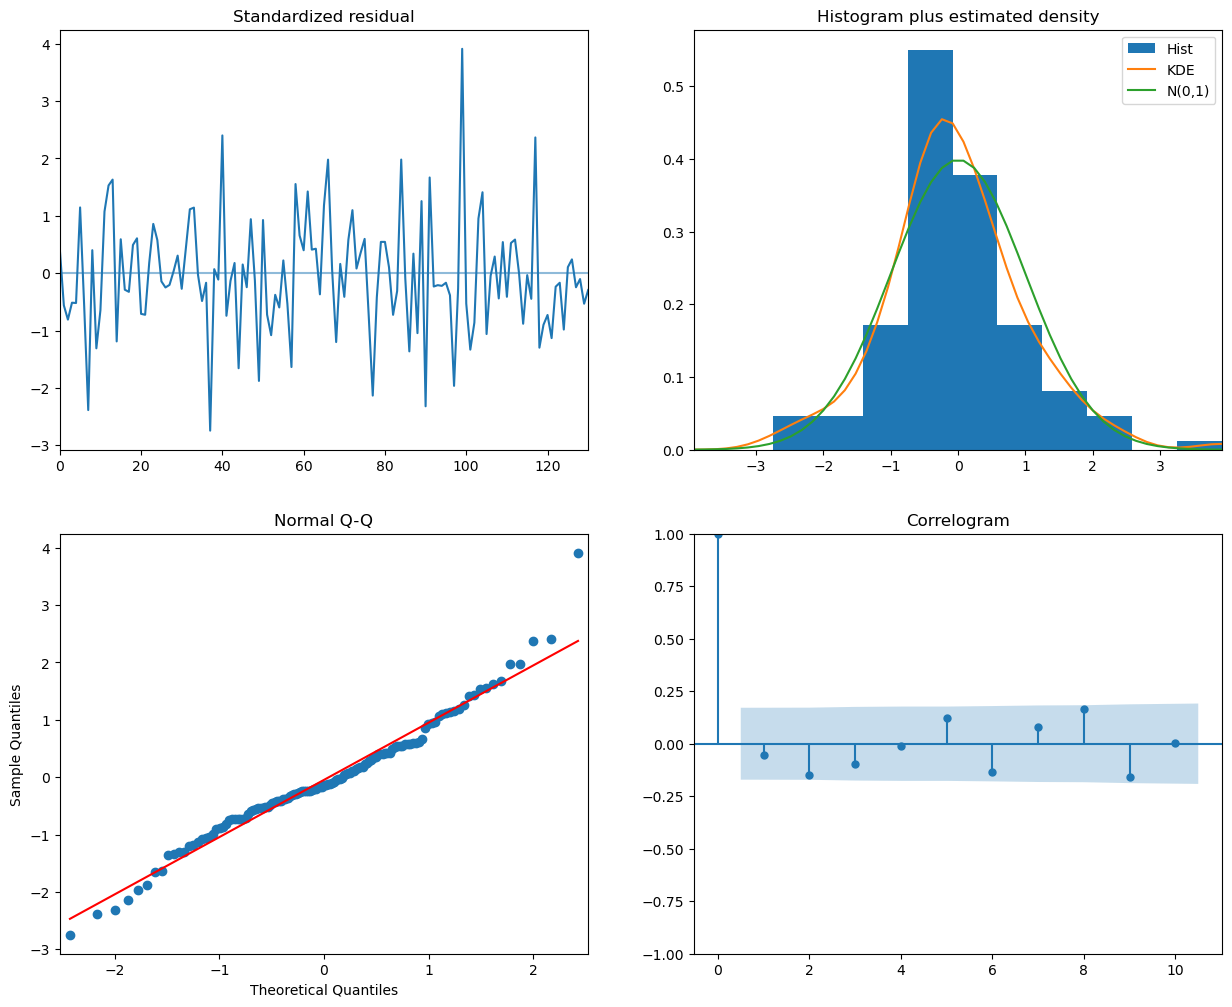

In [19]:
arima_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [20]:
def forecast(ARIMA_model, periods=60):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    #pred = ARIMA_model.predict(n_periods=len(df["#y"]),dynamic=True)
    index_of_fc = pd.date_range(df.index[-1] + pd.DateOffset(days=1), periods = n_periods, freq='D')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(df["price"], color='#1f76b4')
    #plt.plot(pred, color='yellow')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index,
                    lower_series,
                    upper_series,
                    color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast")
    plt.show()



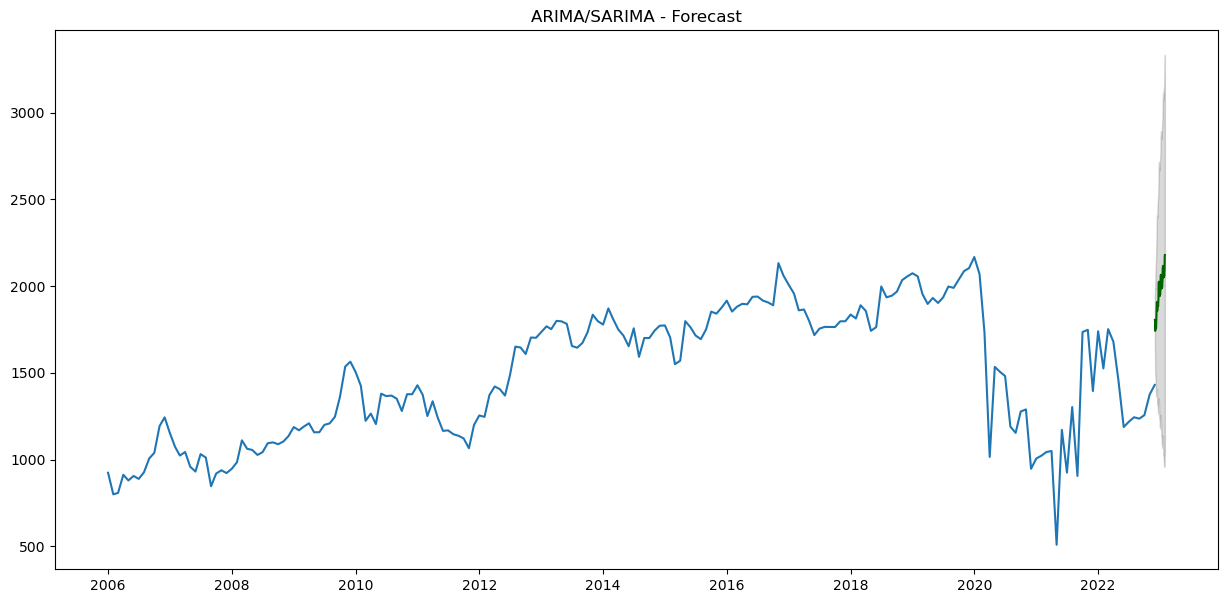

In [21]:
forecast(arima_model)

In [34]:
#nonsesonal
#Standard ARIMA Model
ARIMA_model = auto_arima(train,
                      start_p=1,
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=True, #logs
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True, n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1636.635, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1638.628, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1638.627, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1635.634, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.631 seconds


In [46]:
# SARIMAX Model
SARIMAX_model = auto_arima(train, exogenous=df[['arrival', 'CoC', 'CoP']].iloc[:-60,:],
                           start_p=0, d=1, start_q=0,
                          max_p=5, max_d=5, max_q=5, start_P=0,
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True,
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 10)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1593.340, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1567.537, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.46 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1595.079, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1541.871, Time=0.56 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1525.947, Time=1.11 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=1525.316, Time=1.89 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=1522.549, Time=3.48 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=13.56 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=8.07 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=1520.847, Time=2.51 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=1523.539, Time=1.34 sec
 ARIMA(0,1,0)(5,1,1)[12]             : AIC=1521.599, Time=6.49 sec
 ARIMA(0,1,0)(4,1,1)[12]             : AIC=1520.661, Time=5.21 sec
 ARIMA(0,1,0)(3,1,1)[12]         

In [47]:
#Summary of the model
SARIMAX_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  144
Model:             SARIMAX(0, 1, 0)x(2, 1, [1], 12)   Log Likelihood                -754.785
Date:                              Fri, 06 Oct 2023   AIC                           1517.570
Time:                                      11:49:33   BIC                           1529.071
Sample:                                           0   HQIC                          1522.244
                                              - 144                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1893      0.145     -1.303      0.193      -0.474       0.096
ar.S.L24      -0.2444      0.131     -1.863      0.062      -0.502       0.013
ma.S.L12      -0.8229      0.225     -3.658      0.000      -1.264      -0.382
sigma2      5023.1331    547.813      9.169      0.000    3949.439    6096.827
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                17.86
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                             0.41
Prob(H) (two-sided):                  0.39   Kurtosis:                         4.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

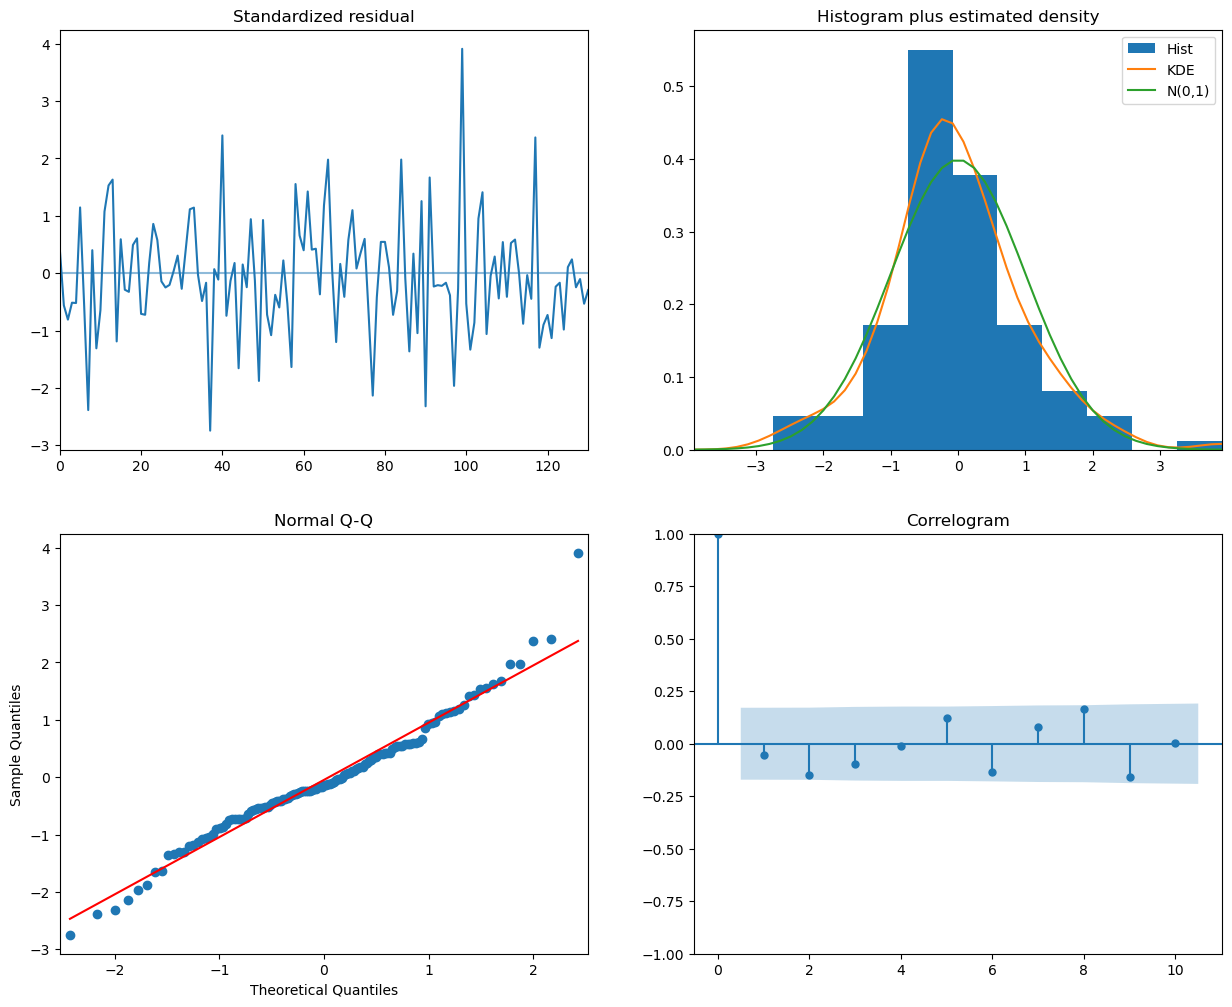

In [50]:
SARIMAX_model.plot_diagnostics(figsize=(15,12))
plt.show()

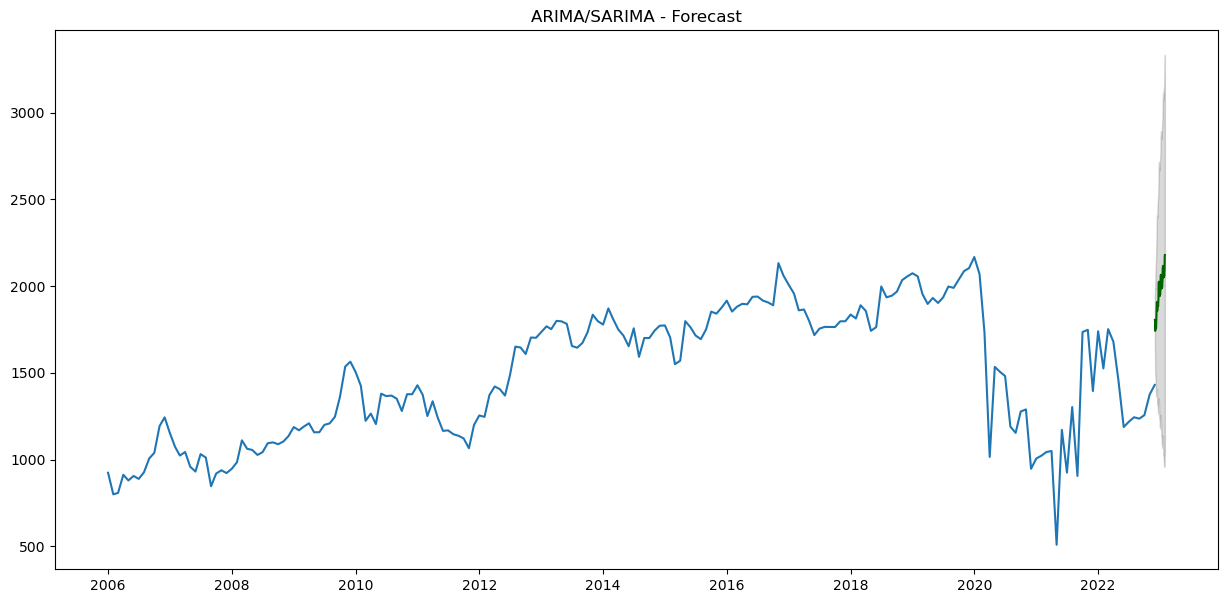

In [51]:
forecast(SARIMAX_model)